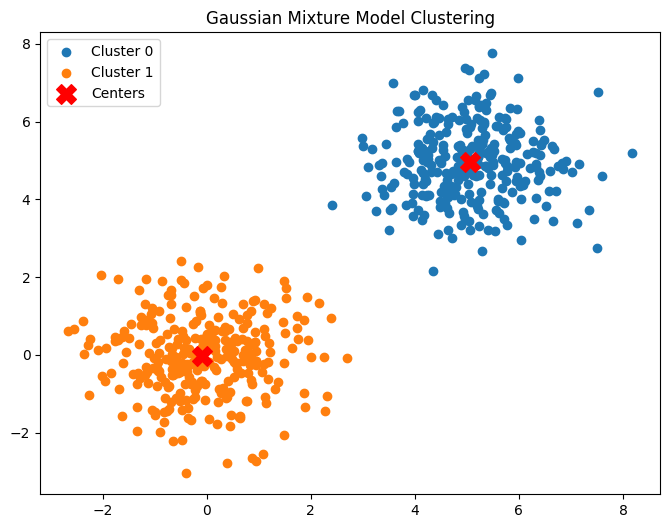

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# 1. 데이터 생성
np.random.seed(0)
# 두 개의 서로 다른 분포에서 데이터를 샘플링
data_1 = np.random.normal(loc=0.0, scale=1.0, size=(300, 2))
data_2 = np.random.normal(loc=5.0, scale=1.0, size=(300, 2))

# 데이터 병합
data = np.vstack((data_1, data_2))

# 2. GMM 모델 생성 및 훈련
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(data)

# 3. 데이터 클러스터링
labels = gmm.predict(data)

# 4. 결과 시각화
plt.figure(figsize=(8, 6))

# 클러스터별 데이터 시각화
for i in range(2):
    cluster_data = data[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {i}")

# GMM의 각 가우시안 중심 위치
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')

plt.title("Gaussian Mixture Model Clustering")
plt.legend()
plt.show()


최적의 클러스터 개수 (BIC 기준): 3
최적의 클러스터 개수 (AIC 기준): 3


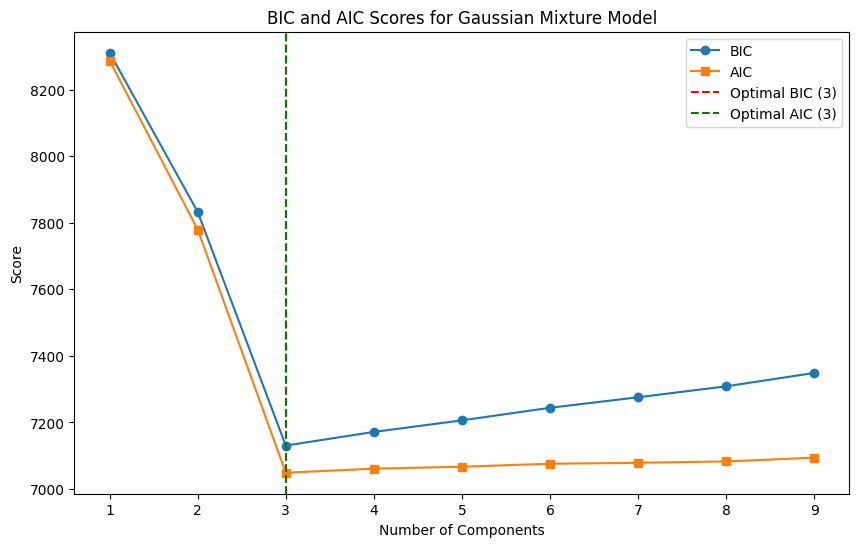

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# 1. 데이터 생성
np.random.seed(0)
data_1 = np.random.normal(loc=0.0, scale=1.0, size=(300, 2))
data_2 = np.random.normal(loc=5.0, scale=1.0, size=(300, 2))
data_3 = np.random.normal(loc=10.0, scale=1.0, size=(300, 2))
data = np.vstack((data_1, data_2, data_3))

# 2. 클러스터 개수를 결정하기 위한 BIC, AIC 계산
bic_scores = []
aic_scores = []
n_components_range = range(1, 10)  # 클러스터 개수 후보

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(data)
    bic_scores.append(gmm.bic(data))  # BIC 계산
    aic_scores.append(gmm.aic(data))  # AIC 계산

# 3. 최적의 클러스터 개수 선택
optimal_bic_n = n_components_range[np.argmin(bic_scores)]
optimal_aic_n = n_components_range[np.argmin(aic_scores)]

print(f"최적의 클러스터 개수 (BIC 기준): {optimal_bic_n}")
print(f"최적의 클러스터 개수 (AIC 기준): {optimal_aic_n}")

# 4. BIC, AIC 시각화
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.plot(n_components_range, aic_scores, label='AIC', marker='s')
plt.axvline(optimal_bic_n, color='r', linestyle='--', label=f'Optimal BIC ({optimal_bic_n})')
plt.axvline(optimal_aic_n, color='g', linestyle='--', label=f'Optimal AIC ({optimal_aic_n})')

plt.title("BIC and AIC Scores for Gaussian Mixture Model")
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.legend()
plt.show()


# k-means와 비교

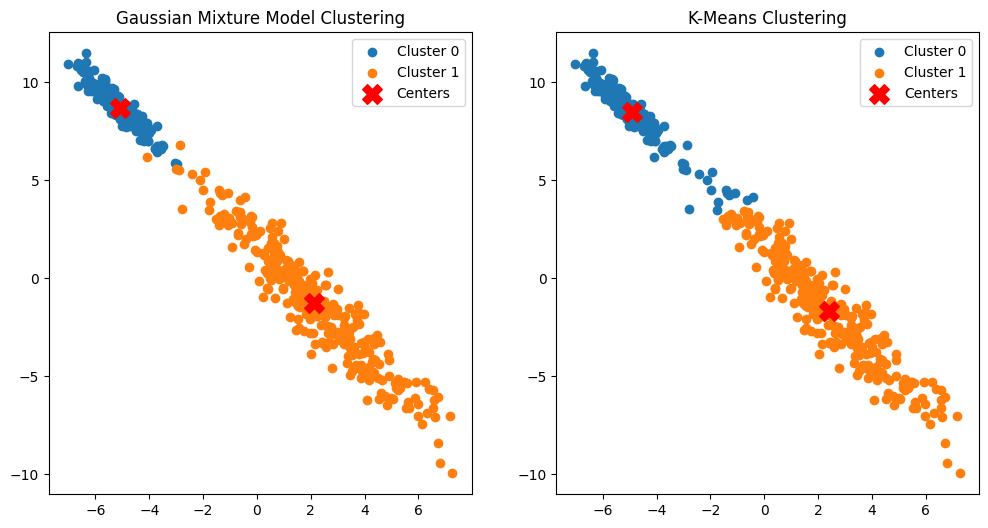

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 1. 데이터 생성 (타원형 클러스터)
np.random.seed(0)
X, _ = make_blobs(n_samples=600, centers=2, cluster_std=[1.0, 3.0], random_state=42)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

# 2. GMM 모델 생성 및 훈련
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(X)

# 3. 데이터 클러스터링 (GMM)
gmm_labels = gmm.predict(X)

# 4. K-Means 모델 생성 및 훈련
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# 5. 데이터 클러스터링 (K-Means)
kmeans_labels = kmeans.labels_

# 6. 결과 시각화
plt.figure(figsize=(12, 6))

# GMM 클러스터링 결과 시각화
plt.subplot(1, 2, 1)
plt.title("Gaussian Mixture Model Clustering")
for i in range(2):
    cluster_data = X[gmm_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {i}")
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
plt.legend()

# K-Means 클러스터링 결과 시각화
plt.subplot(1, 2, 2)
plt.title("K-Means Clustering")
for i in range(2):
    cluster_data = X[kmeans_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {i}")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
plt.legend()

plt.show()